###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: Κωνσταντίνος Δαλαμπέκης

Α.Μ.: 03120055

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [5]:
# Φόρτωση βιβλιοθηκών
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Φόρτωση δεδομένων
file_path = '/train-val.csv'
df = pd.read_csv(file_path)

1.b. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας.

In [6]:
# Φόρτωση δεδομένων για το test set
file_path = '/test.csv'
df1 = pd.read_csv(file_path)

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [7]:
# Επισκόπηση δεδομένων
num_samples = df.shape[0]
print("Πλήθος δειγμάτων:", num_samples)
num_char = df.shape[1]
print("Πληθος χαρακτηριστικών:", num_char)


# Ανάλυση τύπων δεδομένων
feature_types = df.dtypes
print("Τύποι χαρακτηριστικών:")
print(feature_types)

#γ
feature_labels = df.columns
print("Ετικέτες χαρακτηριστικών:")
print(feature_labels)

#δ
print("Πλήθος κατηγοριών:")
for column in df.columns:
    unique_categories = df[column].nunique()
    print(f"'{column}': {unique_categories}")


#ε
category_samples = {col: df[col].value_counts() for col in df.columns}
print(category_samples)

#στ
corr_matrix = df.corr()
print(corr_matrix)

Πλήθος δειγμάτων: 48423
Πληθος χαρακτηριστικών: 24
Τύποι χαρακτηριστικών:
id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object
Ετικέτες χαρακτηριστικών:
Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3

<ipython-input-7-8553c2402cab>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [8]:
# Προεπεξεργασία: Αφαίρεση χαρακτηριστικών με πολλές απουσιάζουσες τιμές
drop_cols = ['id', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df.drop(columns=drop_cols, inplace=True)

#Για το test.csv
drop_cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df1.drop(columns=drop_cols, inplace=True)


3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [9]:
# Χειρισμός απουσιάζουσων τιμών με SimpleImputer
missing_values = df.isnull().sum()
print("Απουσιάζουσες τιμές ανά στήλη:")
print(missing_values)

Απουσιάζουσες τιμές ανά στήλη:
Date                0
Location            0
MinTemp           160
MaxTemp           101
Rainfall            0
WindGustDir      3121
WindGustSpeed    3093
WindDir9am       3821
WindDir3pm       1328
WindSpeed9am      357
WindSpeed3pm      857
Humidity9am       558
Humidity3pm      1259
Pressure9am      4780
Pressure3pm      4789
Temp9am           226
Temp3pm           913
RainToday           0
RainTomorrow        0
dtype: int64


In [10]:
#Για το test.csv
missing_values = df.isnull().sum()
print("Απουσιάζουσες τιμές ανά στήλη:")
print(missing_values)

Απουσιάζουσες τιμές ανά στήλη:
Date                0
Location            0
MinTemp           160
MaxTemp           101
Rainfall            0
WindGustDir      3121
WindGustSpeed    3093
WindDir9am       3821
WindDir3pm       1328
WindSpeed9am      357
WindSpeed3pm      857
Humidity9am       558
Humidity3pm      1259
Pressure9am      4780
Pressure3pm      4789
Temp9am           226
Temp3pm           913
RainToday           0
RainTomorrow        0
dtype: int64


In [11]:
missing_values_percentage = df.isnull().mean() * 100
print(missing_values_percentage)

Date             0.000000
Location         0.000000
MinTemp          0.330421
MaxTemp          0.208579
Rainfall         0.000000
WindGustDir      6.445284
WindGustSpeed    6.387461
WindDir9am       7.890878
WindDir3pm       2.742498
WindSpeed9am     0.737253
WindSpeed3pm     1.769820
Humidity9am      1.152345
Humidity3pm      2.600004
Pressure9am      9.871342
Pressure3pm      9.889928
Temp9am          0.466720
Temp3pm          1.885468
RainToday        0.000000
RainTomorrow     0.000000
dtype: float64


In [12]:
#Για το test.csv
missing_values_percentage = df1.isnull().mean() * 100
print(missing_values_percentage)

Date             0.000000
Location         0.000000
MinTemp          0.360862
MaxTemp          0.164965
Rainfall         0.000000
WindGustDir      7.134756
WindGustSpeed    7.093515
WindDir9am       7.619342
WindDir3pm       2.938447
WindSpeed9am     0.783586
WindSpeed3pm     1.897103
Humidity9am      1.113517
Humidity3pm      2.505413
Pressure9am      9.712341
Pressure3pm      9.794824
Temp9am          0.494896
Temp3pm          1.938344
RainToday        0.000000
dtype: float64


Για να χειριστούμε τις απουσιάζουσες τιμές θα χρησιμοποιήσουμε δυο στρατηγικές. Η πρώτη θα εφαρμόζεται στα χαρακτηριστικά με αριθμητικά στοιχεία και θα γίνεται η συμπλήρωση των απουσιαζουσών τιμών με την μέση τιμή των δειγμάτων του χαρακτηριστικού αυτού. Την δεύτερη θα την εφαρμόσουμε στις στήλες που έχουν κατηγορηματικά στοιχεία και θα συμπληρώσουμε τις απουσιάζουσες τιμές με την τιμή που εμφανίζεται πιο συχνά στην στήλη αυτή.

In [13]:
# Χειρισμός απουσιάζουσων τιμών με SimpleImputer
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Εφαρμογή στα δεδομένα
numerical_features = ['Rainfall', 'MinTemp', 'MaxTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday']
df[numerical_features] = median_imputer.fit_transform(df[numerical_features])
#o median imputer εκπαιδεύεται (fit) στα δεδομένα των στηλών numerical_features και υπολογιζει μεση τιμ
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
df[categorical_features] = mode_imputer.fit_transform(df[categorical_features])
#Δεν βάλαμε τα πεδία Location, Date καθώς για τα χαρακτηριστικά αυτά δεν υπάρχουν απουσιάζουσες τιμές

final_missing_values_check = df.isnull().sum()

final_missing_values_check


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
#Για το test.csv
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

numerical_features = ['Rainfall', 'MinTemp', 'MaxTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday']
df1[numerical_features] = median_imputer.fit_transform(df1[numerical_features])

categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
df1[categorical_features] = mode_imputer.fit_transform(df1[categorical_features])
#Δεν βάλαμε τα πεδία Location, Date καθώς για τα χαρακτηριστικά αυτά δεν υπάρχουν απουσιάζουσες τιμές

final_missing_values_check = df1.isnull().sum()

final_missing_values_check


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

Αρχικά θα μετατρέψουμε τα στοιχεία του χαρακτηριστικού Location σε αριθμητικά χρησιμοποιώντας τον One-hot encoder.


In [15]:

# Εφαρμογή one-hot encoding στο χαρακτηριστικό 'Location'

cat = ['Location']

#δημιουργία one hot encoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
#Εφαρμογή του OneHotEncoder στα δεδομένα του DataFrame
encoded_features = onehot_encoder.fit_transform(df[cat])
#Λήψη των ονομάτων των νέων δυαδικών στηλών που δημιουργήθηκαν
encoded_feature_names = onehot_encoder.get_feature_names_out(cat)

# Δημιουργία νέου DataFrame με τα encoded χαρακτηριστικά
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Συνένωση των DataFrame df και encoded_df
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Διαγραφή της αρχικής στήλης 'Location'
df.drop('Location', axis=1, inplace=True)

# Εμφάνιση των πρώτων γραμμών για επιβεβαίωση
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,2009-03-04,13.8,22.1,0.2,WNW,57.0,W,WNW,26.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009-03-05,11.5,22.0,0.0,SW,50.0,WSW,W,19.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009-03-09,13.8,31.8,0.0,NNE,24.0,SSE,NE,6.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009-03-10,15.5,32.0,0.0,NE,50.0,ESE,E,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009-03-11,18.4,30.5,1.2,NE,44.0,NE,N,15.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
first_act = ['Location']

# Applying OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_features = onehot_encoder.fit_transform(df1[first_act])
encoded_feature_names = onehot_encoder.get_feature_names_out(first_act)

# Δημιουργία νέου DataFrame με τα encoded χαρακτηριστικά
encoded_df1 = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Συνένωση των DataFrame df1 και encoded_df1
df1 = pd.concat([df1.reset_index(drop=True), encoded_df1.reset_index(drop=True)], axis=1)

# Διαγραφή της αρχικής στήλης 'Location'
df1.drop('Location', axis=1, inplace=True)

# Εμφάνιση των πρώτων γραμμών για επιβεβαίωση
df1.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,22/03/2009,14.6,30.0,0.0,NE,37.0,E,NNE,4.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15/04/2009,10.7,21.9,0.0,W,63.0,NW,W,26.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21/04/2009,5.7,21.4,0.0,ESE,17.0,ENE,SSE,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24/04/2009,10.6,16.2,0.0,WNW,39.0,ESE,NNE,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19/05/2009,3.7,19.1,0.0,SSE,19.0,N,SSE,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Μετατρέπουμε τις τιμές που βρίσκονται στις στήλες  από τη μορφή που είναι σε αντικείμενα ημερομηνίας
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

df.drop('Date', axis=1, inplace=True)

In [18]:
#Για το test.csv
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Day'] = pd.to_datetime(df1['Date']).dt.day

df1.drop('Date', axis=1, inplace=True)

<ipython-input-18-6f8885d926cd>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Year'] = pd.to_datetime(df1['Date']).dt.year
<ipython-input-18-6f8885d926cd>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Month'] = pd.to_datetime(df1['Date']).dt.month
<ipython-input-18-6f8885d926cd>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Day'] = pd.to_datetime(df1['Date']).dt.day


In [19]:

# Assuming df is your DataFrame and it has a column like 'WindDir9am' for wind direction

# Define a mapping from wind direction categories to angles
direction_to_angle = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Ορίζουμε μια συνάρτηση που μετατρέπει γωνίες κατεύθυνσης σε ακτίνια
def direction_to_radians(direction):
    return np.radians(direction_to_angle.get(direction, 0))

# Υπολογίζουμε τις κατευθύνσεις του ανέμου σε ακτίνια
df['WindDir9am_radians'] = df['WindDir9am'].apply(direction_to_radians)
df['WindDir3pm_radians'] = df['WindDir3pm'].apply(direction_to_radians)
df['WindGustDir_radians'] = df['WindGustDir'].apply(direction_to_radians)

wind_cols = ['WindDir9am', 'WindDir3pm', 'WindGustDir'  ]
df.drop(columns=wind_cols, inplace=True)


In [20]:

# Assuming df1 is your DataFrame and it has a column like 'WindDir9am' for wind direction

# Define a mapping from wind direction categories to angles
direction_to_angle = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Ορίζουμε μια συνάρτηση που μετατρέπει γωνίες κατεύθυνσης σε ακτίνια
def direction_to_radians(direction):
    return np.radians(direction_to_angle.get(direction, 0))

# Υπολογίζουμε τις κατευθύνσεις του ανέμου σε ακτίνια
df1['WindDir9am_radians'] = df1['WindDir9am'].apply(direction_to_radians)
df1['WindDir3pm_radians'] = df1['WindDir3pm'].apply(direction_to_radians)
df1['WindGustDir_radians'] = df1['WindGustDir'].apply(direction_to_radians)

wind_cols = ['WindDir9am', 'WindDir3pm', 'WindGustDir'  ]
df1.drop(columns=wind_cols, inplace=True)

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [21]:
numerical_cols = [ 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
                  'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                  'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Year,Month,Day,WindDir9am_radians,WindDir3pm_radians,WindGustDir_radians
0,0.519119,0.096661,-0.273618,1.330120,1.382060,1.674755,-0.726456,-1.340019,-0.674986,-0.521337,...,0.0,0.0,0.0,0.0,-1.503813,-1.515409,-1.341664,4.712389,5.105088,5.105088
1,0.138832,0.081395,-0.300728,0.813885,0.597740,1.674755,-0.566107,-0.989976,-0.794840,-0.718148,...,0.0,0.0,0.0,0.0,-1.503813,-1.515409,-1.228286,4.319690,4.712389,3.926991
2,0.519119,1.577446,-0.300728,-1.103558,-0.858856,-0.136578,-1.154053,-1.240007,0.104068,-0.097438,...,0.0,0.0,0.0,0.0,-1.503813,-1.515409,-0.774770,2.748894,0.785398,0.392699
3,0.800200,1.607978,-0.300728,0.813885,-1.307039,-1.608286,-1.047154,-1.390026,0.074104,-0.052021,...,0.0,0.0,0.0,0.0,-1.503813,-1.515409,-0.661392,1.963495,1.570796,0.785398
4,1.279692,1.378990,-0.138069,0.371398,0.149556,0.089839,-0.726456,-1.490038,0.343776,0.220486,...,0.0,0.0,0.0,0.0,-1.503813,-1.515409,-0.548013,0.785398,0.000000,0.785398


In [22]:
#Για το test.csv
from sklearn.preprocessing import StandardScaler
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
                  'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                  'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day' ]


scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Year,Month,Day,WindDir9am_radians,WindDir3pm_radians,WindGustDir_radians
0,0.652749,1.295990,-0.29202,-0.144789,-1.090087,0.093804,-0.769845,-1.139372,-0.609203,-0.548721,...,0.0,0.0,0.0,0.0,-1.485946,-1.252120,0.713369,1.570796,0.392699,0.785398
1,0.003370,0.057754,-0.29202,1.810342,1.398471,1.459361,-1.410078,-1.289492,-1.593697,-0.983865,...,0.0,0.0,0.0,0.0,-1.485946,-0.915647,-0.108514,5.497787,4.712389,4.712389
2,-0.829167,-0.018680,-0.29202,-1.648737,-0.863854,-1.271754,-0.129611,-0.689013,0.942120,0.681688,...,0.0,0.0,0.0,0.0,-1.485946,-0.915647,0.595957,1.178097,2.748894,1.963495
3,-0.013281,-0.813597,-0.29202,0.005605,-0.750738,-1.613143,0.190506,1.662864,-1.489281,-2.094235,...,0.0,0.0,0.0,0.0,-1.485946,-0.915647,0.948192,1.963495,0.392699,5.105088
4,-1.162182,-0.370278,-0.29202,-1.498342,-1.542552,-0.816568,0.884092,-0.088533,0.703455,0.531638,...,0.0,0.0,0.0,0.0,-1.485946,-0.579174,0.361133,0.000000,2.748894,2.748894


3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [23]:
# Χ: Χαρακτηριστικά του μοντέλου χωρίς τον στόχο/ y: στόχος
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
print(X.shape, y.shape)

(48423, 67) (48423,)


3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [24]:
#X_train, y_train: Αυτά τα σύνολα περιλαμβάνουν τα δεδομένα εκπαίδευσης.
#X_val, y_val: Αυτά τα σύνολα περιλαμβάνουν τα δεδομένα επικύρωσης

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)



### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [25]:

# Αρχικοποίηση των ταξινομητών με τις default τιμές των παραμέτρων
nvb = GaussianNB()
knn = KNeighborsClassifier()
lrg = LogisticRegression()
mlp = MLPClassifier()
svc = SVC()
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier()

# Εκπαίδευση (fit) των ταξινομητών με το σύνολο εκπαίδευσης
nvb.fit(X_train, y_train)
knn.fit(X_train, y_train)
lrg.fit(X_train, y_train)
mlp.fit(X_train, y_train)
svc.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rforest.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier()

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [26]:
predictions_nvb = nvb.predict(X_val)
predictions_knn = knn.predict(X_val)
predictions_lrg = lrg.predict(X_val)
predictions_mlp = mlp.predict(X_val)
predictions_svc = svc.predict(X_val)
predictions_dtree = dtree.predict(X_val)
predictions_rforest = rforest.predict(X_val)



4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [27]:

# Υπολογισμός του F1 score για κάθε μοντέλο
f1_score_nvb = f1_score(y_val, nvb.predict(X_val))
f1_score_knn = f1_score(y_val, knn.predict(X_val))
f1_score_lrg = f1_score(y_val, lrg.predict(X_val))
f1_score_mlp = f1_score(y_val, mlp.predict(X_val))
f1_score_svc = f1_score(y_val, svc.predict(X_val))
f1_score_dtree = f1_score(y_val, dtree.predict(X_val))
f1_score_rforest = f1_score(y_val, rforest.predict(X_val))

# Εμφάνιση των F1 scores
print("F1 Score - Gaussian Naive Bayes:", f1_score_nvb)
print("F1 Score - KNeighbors Classifier:", f1_score_knn)
print("F1 Score - Logistic Regression:", f1_score_lrg)
print("F1 Score - MLP Classifier:", f1_score_mlp)
print("F1 Score - SVC:", f1_score_svc)
print("F1 Score - Decision Tree:", f1_score_dtree)
print("F1 Score - Random Forest:", f1_score_rforest)


F1 Score - Gaussian Naive Bayes: 0.473807662236122
F1 Score - KNeighbors Classifier: 0.5723010598167775
F1 Score - Logistic Regression: 0.6180922210489264
F1 Score - MLP Classifier: 0.6343597509675248
F1 Score - SVC: 0.6129803272660416
F1 Score - Decision Tree: 0.5476435178387902
F1 Score - Random Forest: 0.6229390681003584


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


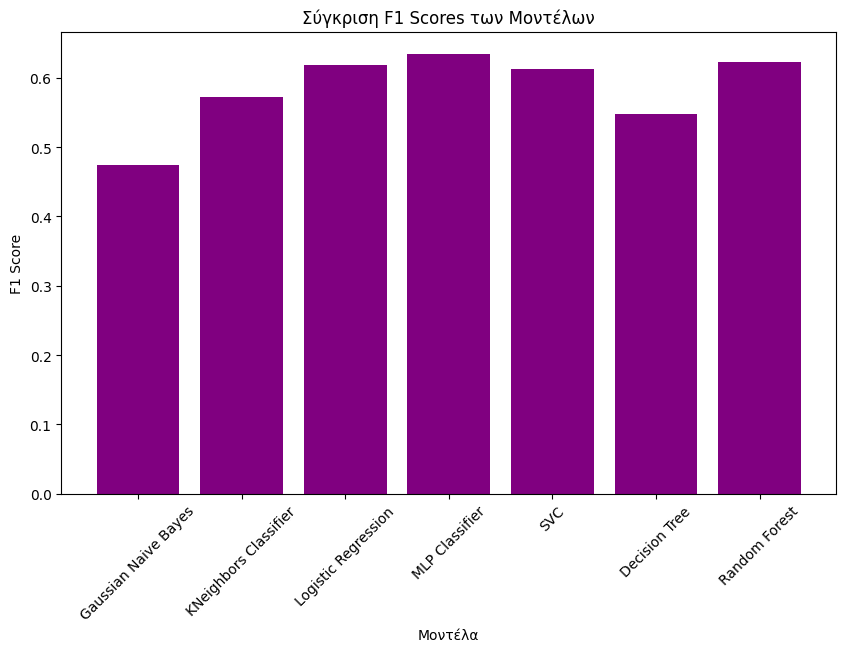

In [28]:

# Υπολογισμός των F1 scores
f1_scores = {
    'Gaussian Naive Bayes': f1_score(y_val, nvb.predict(X_val)),
    'KNeighbors Classifier': f1_score(y_val, knn.predict(X_val)),
    'Logistic Regression': f1_score(y_val, lrg.predict(X_val)),
    'MLP Classifier': f1_score(y_val, mlp.predict(X_val)),
    'SVC': f1_score(y_val, svc.predict(X_val)),
    'Decision Tree': f1_score(y_val, dtree.predict(X_val)),
    'Random Forest': f1_score(y_val, rforest.predict(X_val))
}

# Δημιουργία bar plot
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='purple')
plt.xlabel('Μοντέλα')
plt.ylabel('F1 Score')
plt.title('Σύγκριση F1 Scores των Μοντέλων')
plt.xticks(rotation=45)
plt.show()

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/1bcmuoeRVY0y5ZuY6nZcmzy8_5fOFR4Oa/view?usp=drive_link).


In [45]:
predictions_test = mlp.predict(df1)


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [46]:
predictions_df = pd.DataFrame({'RainTomorrow': predictions_test})
predictions_df.index += 1
predictions_df.to_csv('/test_predictions_mlp1.csv', index=True, index_label='id')

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [32]:

param_grids = {
    KNeighborsClassifier(): {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance']},
    LogisticRegression(): {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg','liblinear','lbfgs', 'saga']},
    MLPClassifier(): {'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50), (100, 100)], 'activation': ['relu', 'tanh']},
    SVC(): {'kernel': ['linear']},
    #max_depth: αυξάνει κίνδυνο overfitting όπως και min_samples_split το οποίο οδηγεί σε  overfitting για μικ΄ρη τιμή
    DecisionTreeClassifier(): {'max_depth': [None, 5, 10, 15, 20, 25], 'min_samples_split': [2, 5, 10, 15]},
    RandomForestClassifier(): {'n_estimators': [100, 200, 300], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
}

grid_search_results = {}

for classifier, params in param_grids.items():
    grid_search = GridSearchCV(classifier, params, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    grid_search_results[classifier] = grid_search
    print(f"Βέλτιστες υπερπαράμετροι για {classifier.__class__.__name__}: {grid_search.best_params_}")

Βέλτιστες υπερπαράμετροι για KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Βέλτιστες υπερπαράμετροι για LogisticRegression: {'C': 10, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Βέλτιστες υπερπαράμετροι για MLPClassifier: {'activation': 'tanh', 'hidden_layer_sizes': (50,)}
Βέλτιστες υπερπαράμετροι για SVC: {'kernel': 'linear'}
Βέλτιστες υπερπαράμετροι για DecisionTreeClassifier: {'max_depth': 5, 'min_samples_split': 10}
Βέλτιστες υπερπαράμετροι για RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [33]:
predictions = {}
for classifier in param_grids.keys():
    grid_search = grid_search_results[classifier]
    predictions[classifier.__class__.__name__] = grid_search.best_estimator_.predict(X_val)


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [34]:
f1_scores = {}
for classifier in param_grids.keys():
    grid_search = grid_search_results[classifier]
    y_pred = grid_search.best_estimator_.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')
    f1_scores[classifier.__class__.__name__] = f1

f1_scores

{'KNeighborsClassifier': 0.8234082226363068,
 'LogisticRegression': 0.8406588713704021,
 'MLPClassifier': 0.8470030317932802,
 'SVC': 0.8388670347857072,
 'DecisionTreeClassifier': 0.8293341212055582,
 'RandomForestClassifier': 0.8450377524140744}

6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


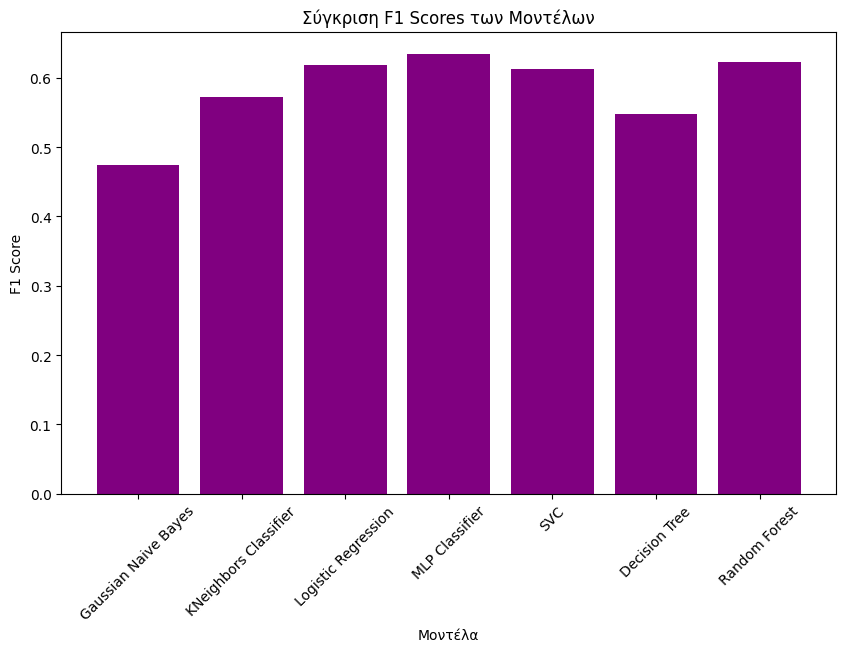

In [35]:

# Υπολογισμός των F1 scores
f1_scores = {
    'Gaussian Naive Bayes': f1_score(y_val, nvb.predict(X_val)),
    'KNeighbors Classifier': f1_score(y_val, knn.predict(X_val)),
    'Logistic Regression': f1_score(y_val, lrg.predict(X_val)),
    'MLP Classifier': f1_score(y_val, mlp.predict(X_val)),
    'SVC': f1_score(y_val, svc.predict(X_val)),
    'Decision Tree': f1_score(y_val, dtree.predict(X_val)),
    'Random Forest': f1_score(y_val, rforest.predict(X_val))
}

# Δημιουργία bar plot
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='purple')
plt.xlabel('Μοντέλα')
plt.ylabel('F1 Score')
plt.title('Σύγκριση F1 Scores των Μοντέλων')
plt.xticks(rotation=45)
plt.show()


### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [36]:
mlp = grid_search_results[list(param_grids.keys())[2]]
predictions_test = mlp.best_estimator_.predict(df1)


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [39]:
predict_df = pd.DataFrame({'RainTomorrow': predictions_test})
predict_df.index += 1
predict_df.to_csv('/test_predict_second_mlp1.csv', index=True, index_label='id')